<a href="https://colab.research.google.com/github/ueki5/colaboratory/blob/main/playground-009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
# 必要ライブラリ・コマンドの導入
!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1
w = !apt install tree
print(w[-2])

tree is already the newest version (2.0.2-1).


In [170]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

torch.manual_seed(123)
def calc_result(x):
  return x**2 + torch.randn(100,1)*0.1
x = torch.randn(100, 1)
y = calc_result(x)
# print(x)
# print(y)

x_train = x[  :50, :]
x_test  = x[50:  , :]
y_train = y[  :50, :]
y_test  = y[50:  , :]


In [171]:
# レイヤー関数定義

# 中間層の次元数
dimension=100

# 予測関数
l1 = torch.nn.Linear(1, dimension) # 初段
l2 = torch.nn.Linear(dimension, dimension) # 中間層
l3 = torch.nn.Linear(dimension, dimension) # 中間層
l4 = torch.nn.Linear(dimension, 1) # 最終段

# 活性化関数
relu = torch.nn.ReLU(inplace=True)

# 関数合成
net = torch.nn.Sequential(
    l1,
    relu,
    l2,
    relu,
    l3,
    relu,
    l4,
)


# ダミー入力データを作成
inputs = torch.randn(100, 1)
output = net(inputs)

# 入力テンソルと出力テンソルのshape
print(f'入力テンソル:{inputs.shape}')
print(f'出力テンソル:{output.shape}')



入力テンソル:torch.Size([100, 1])
出力テンソル:torch.Size([100, 1])


In [172]:
# 繰り返し制御
num_epochs = 1000
lr = 0.01
momentum = 0.9

# optimizerとしてSGD（確率的勾配降下法を指定する）
import torch.optim as optim
optimizer = optim.SGD([l1.weight, l1.bias], lr=lr, momentum=momentum)

# 記録用配列初期化
history = np.zeros((0, 2))

# ループ処理
def mse(Yp, Y):
  loss = ((Yp - Y) ** 2).mean()
  return loss

for epoch in range(num_epochs):

  # 予測計算
  Yp = net(x_train)
  # 損失計算
  loss = mse(Yp, y_train)
  # 勾配計算
  loss.backward()
  # パラメータ修正
  optimizer.step()
  # 勾配値初期化
  optimizer.zero_grad()

  # 損失の記録
  if (epoch %10 == 0):
    item = np.array([epoch, loss.item()])
    history = np.vstack((history, item))
    # print(f'epoch = {epoch}, loss = {loss:.4f}')


('0.weight', Parameter containing:
tensor([[-1.6414e+00],
        [-1.4777e-01],
        [ 2.4926e-02],
        [-1.3300e+00],
        [ 3.6395e-01],
        [-2.0099e-02],
        [ 3.9010e-01],
        [ 9.4815e-02],
        [ 1.0779e+00],
        [-6.5761e-04],
        [-6.6466e-01],
        [ 4.0150e-02],
        [ 7.9047e-01],
        [ 9.8342e-02],
        [-3.2752e-01],
        [-7.3053e-01],
        [-6.9177e-04],
        [ 5.8628e-01],
        [-5.8182e-01],
        [-1.1631e+00],
        [ 2.5797e-01],
        [-5.4902e-01],
        [-3.8094e-02],
        [-8.3985e-01],
        [ 1.6797e-01],
        [-1.9836e+00],
        [ 1.5769e-01],
        [ 1.4125e+00],
        [ 1.5973e-04],
        [ 6.5668e-01],
        [-1.5626e+00],
        [ 6.1405e-01],
        [ 1.1235e-01],
        [ 5.6826e-01],
        [-3.2419e-02],
        [-3.8454e-01],
        [ 5.6028e-01],
        [ 1.7028e-02],
        [-4.1143e-01],
        [ 7.0402e-01],
        [ 3.4952e-01],
        [-8.1479e-01],

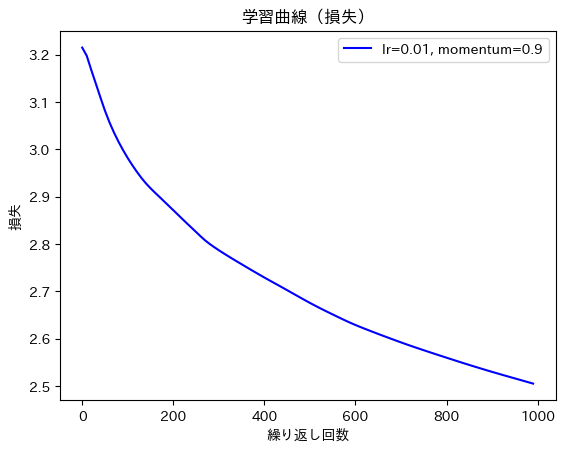

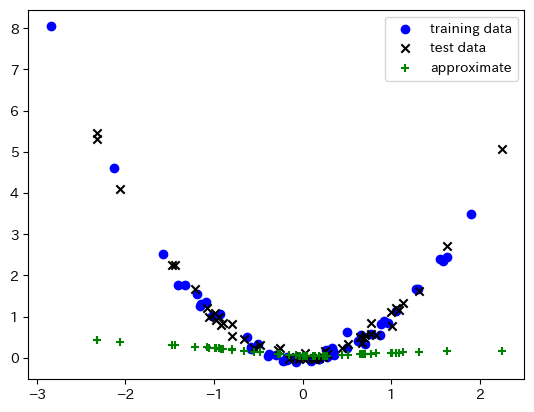

In [173]:
# 学習曲線の表示（損失）

# for param in net.named_parameters():
#   print(param)

plt.plot(history[:, 0], history[:, 1], 'b', label=f'lr={lr}, momentum={momentum}')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.legend()
plt.title('学習曲線（損失）')
plt.show()

# 訓練データ、検証データ、予測データの表示
plt.scatter(x_train.data, y_train.data, c='b', label='training data')
plt.scatter(x_test.data,  y_test.data,  c='k', label='test data', marker='x')
plt.scatter(x_test.data, net(x_test).data, c='g', label='approximate', marker='+')

plt.legend()
plt.show()
